# Image processing in Python
### Cell migration

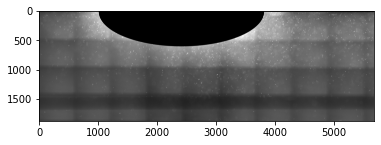

In [164]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
#%matplotlib inline
# Importing Image class from PIL module
from PIL import Image

# List of Y cordinate
Ycor = [0,2952,2916,2872,2912,2752]

# Opens a image in RGB mode
filename = '6.tif'
im = Image.open(filename)

width, height = im.size
im = im.resize((width//2, height//2))

# Setting the points for cropped image
# left = 0
# top = 500
# right = width//2
# bottom = width//2
 
# Cropped image of above dimension
# (It will not change original image)
# im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im.save('cropped.tif')
imshow(im, cmap='gray')

In [165]:
Ycor[int(filename[0])-1]

2752

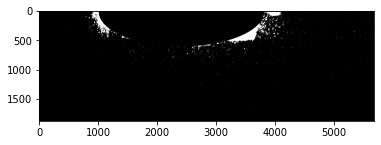

In [166]:
import cv2
im_gray = cv2.imread('cropped.tif', cv2.IMREAD_GRAYSCALE)
thresh = 180
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite('bw_image.png', im_bw)
imshow(im_bw, cmap='gray')

In [167]:
import pandas as pd
import numpy as np
df_bw = pd.DataFrame(im_bw)
df = np.transpose(df_bw)
#df.iloc[5614,695]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
import matplotlib.pyplot as plt
import numpy as np
# from scipy.interpolate import UnivariateSpline
# from csaps import csaps

points = []
for index, row in df.iterrows():
    for i,x in enumerate(row):
        if x==255:
            points.append([index,i])
df_plt = pd.DataFrame(points)
df_plt = df_plt*2
df_plt

,0,1
0,402,1502
1,402,1504
2,404,1502
3,404,1504
4,406,1502
...,...,...
157347,11372,58
157348,11374,52
157349,11374,54
157350,11374,56


<Figure size 432x288 with 0 Axes>

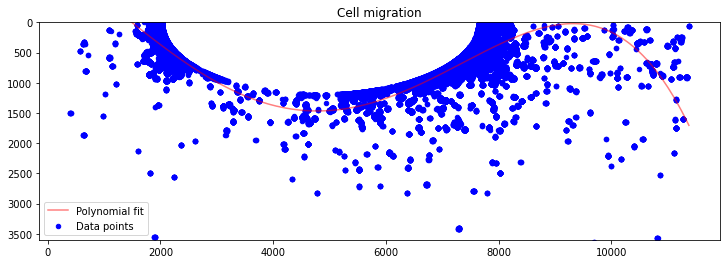

In [169]:
from matplotlib import pyplot as plt
from matplotlib.figure import figaspect

x, y = df_plt[0],df_plt[1]
fit = np.polyfit(x, y, 4)
a = fit[0]
b = fit[1]
c = fit[2]
d = fit[3]
e = fit[4]
fit_equation = a * np.power(x,4) + b * np.power(x,3) + c * np.square(x) + d * x + e
#fit_equation = a * np.power(x,3) + b * np.square(x) + c * x + d
#fit_equation = a * np.square(x) + b * x + c
#spl = UnivariateSpline(x, y)
#spl = csaps(x, y, smooth=0.85)

#Plotting
fig = plt.figure()
h, w = figaspect(width/height)
fig, ax1 = plt.subplots(figsize=(w,h))

# ax1 = fig1.subplots()

ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
#ax1.plot(x, spl(x),color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 20, marker = 'o', color = 'b', label = 'Data points')
ax1.set_title('Cell migration')
ax1.legend()
plt.gca().invert_yaxis()
plt.ylim([3600, 0])
plt.savefig(filename.replace('tif','png'))
plt.show()


In [170]:
df_plt.columns = ['X','Y']
df_flt = df_plt[df_plt['Y']>Ycor[int(filename[0])-1]]
df_flt = df_flt.groupby(df_flt['X']//1538).count()
df_flt.drop('X', axis = 1, inplace=True)
df_flt.insert(loc = 0, column = 'Xmm', value = df_flt.index)
df_flt.reset_index(drop=True, inplace=True)
df_flt.rename(columns={'Y':'Total Cells'}, inplace=True)
df_flt.to_csv((filename[0]+'.csv'), index=False)
df_flt

,Xmm,Total Cells
0,1,8
1,3,6
2,4,40
3,5,4
4,6,3
5,7,6


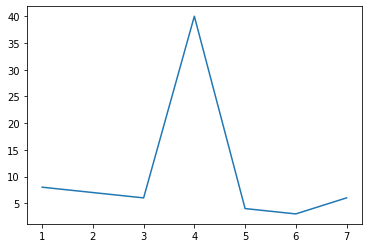

In [171]:
plt.plot(df_flt['Xmm'],df_flt['Total Cells'])
#plt.gca().invert_yaxis()